# Matplotlib

Matplotlib provides numerous ways to create static, animated and interactive visualizations. It is the most popular plotting library for Python. It works easily with both NumPy and Pandas arrays. Seaborn, which I'll cover in my next tutorial futher extends Matplotlib, but it is very important to learn both.

https://matplotlib.org/gallery/index.html is a great page to go to when you are looking for information on making a specific chart type.

### Modules

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import datetime
# Needed for creating 3D axes
from mpl_toolkits import mplot3d

# We need this module to handle the calculations
import mplfinance as mpf

# To show the plots within the notebook
%matplotlib inline
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

### Functional Plot

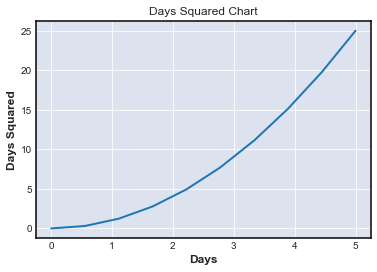

In [20]:
x1 = np.linspace(0, 5, 10)
y1 = x1**2

plt.plot(x1, y1)

plt.title('Days Squared Chart') # add title
plt.xlabel('Days')  # x label
plt.ylabel('Days Squared') # y label

plt.show()

### Multiple Plots

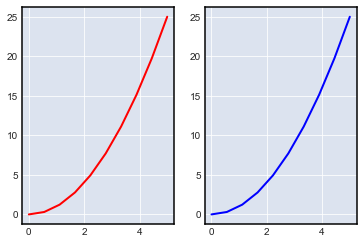

In [21]:
# Define the row and column to print the plot with a number assigned to the plot

# plot in a single column
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'red')
plt.subplot(2, 1, 2)
plt.plot(x1, y1, 'blue')
# (2, 1, n) means i want 2 rows, 1 column and n subplots 

# plot in a single row
plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'red')
plt.subplot(1, 2, 2)
plt.plot(x1, y1, 'blue')

plt.show()

### Figure Objects

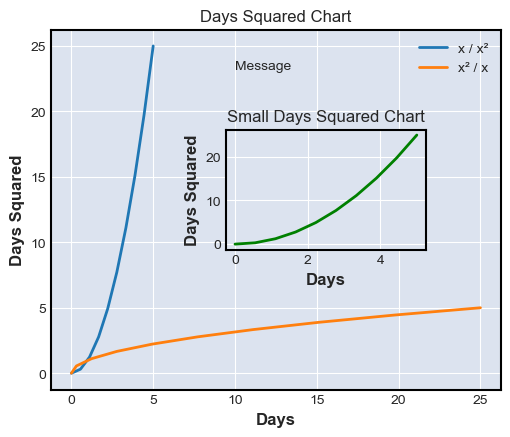

In [22]:
# A figure is an object thats going to conatain all the plot elements and its containes many axes

# Define width & height in inches
# Dots per inch
fig1 = plt.figure(figsize=(5, 4), dpi=100)
axes1 = fig1.add_axes([0.1, 0.1, 0.9, 0.9]) # left, bottom, width, height (0.9 = 90%)

# labels
axes1.set_xlabel('Days')         
axes1.set_ylabel('Days Squared')

# title
axes1.set_title('Days Squared Chart')

# plots
axes1.plot(x1, y1, label='x / x²') # create x / x² plot
axes1.plot(y1, x1, label='x² / x') # create x² / x plot

axes1.legend(loc=0) # loc=0, finds the best position for label
# Add the optional legend with a location number 
# (best: 0, upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# or supply a tuple of x & y from lower left
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html

# create axes2 inside of axes1 and also plot inside of this plot
axes2 = fig1.add_axes([0.45, 0.45, 0.4, 0.3])
axes2.set_xlabel('Days')
axes2.set_ylabel('Days Squared')
axes2.set_title('Small Days Squared Chart')
axes2.plot(x1, y1,'green')

# add text to small plot, the center of the plot being (0, 0)
axes2.text(0, 40, 'Message')

plt.show()

### SubPlots

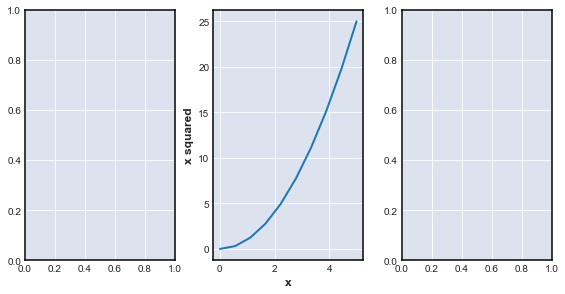

In [23]:
# You can define multiple plots with subplots and it handles creating the axes objects

fig2, axes3 = plt.subplots(figsize=(8, 4), nrows=1, ncols=3)
# 1 rows and 3 columns and the figure size of 8x4
# fig2 is for title and labels

# create space between these plots
plt.tight_layout()

# Access the plots by their index
# config the second plot
# axes3[1].set_title('Plot 2')
axes3[1].set_xlabel('x')
axes3[1].set_ylabel('x squared')
axes3[1].plot(x1, y1)


plt.show()

### Appearance Options

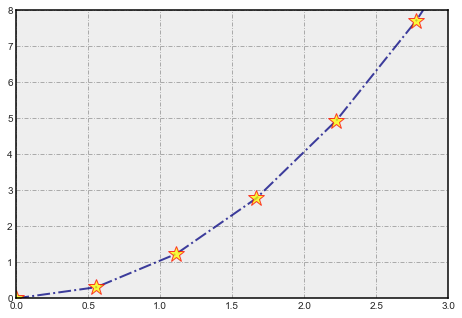

In [24]:
# Default colors (b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white)
# color="0.75" creates a 75% gray
# You can use hexcodes color="#eeefff"
# You can use color names found next like this color="burlywood"
# https://en.wikipedia.org/wiki/Web_colors
# alpha defines the percentage of opacity

# The default line width is 1, so to double it put in 2 and so forth

# There are many line styles 
# matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
# You can also provide a sample like '-.'

# Markers can mark your provided points on the graph
# https://matplotlib.org/3.3.0/api/markers_api.html
# You can change the markersize as well

# markerfacecolor changes the marker fill color
# markeredgecolor changes the marker stroke color
# markeredgewidth changes the markers stroke size
###########################################################################

fig3 = plt.figure(figsize=(6, 4))
axes4 = fig3.add_axes([0, 0, 1, 1])
axes4.plot(x1, y1, color='navy', alpha=0.75, lw=2, ls='-.', marker='*', markersize=17,
          markerfacecolor='yellow', markeredgecolor='red', markeredgewidth=1)


# Set the lower and upper bound of x & y axis
# inorder to zoom in the plot and get a specific area of plot
axes4.set_xlim([0,3])
axes4.set_ylim([0,8])


# Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
# color='0.6' : 60% black (grey) color
# dashes are for the grid
axes4.grid(True, color='0.6', dashes=(5, 2, 1, 2))

# change background color
axes4.set_facecolor('#eee')

plt.show()

### Save Visualization to a File

In [25]:
# save as png file with default size
fig3.savefig('savePNG.png')

# save as png file with specific size
fig3.savefig('savePNG.png', dpi=(300))

### Working with Pandas Dataframe

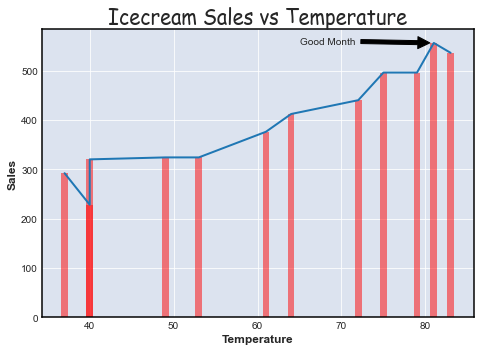

In [26]:
# import csv file
iceDF = pd.read_csv('icecreamsales.csv')

# sort the dataframe by the values in temperature column
iceDF = iceDF.sort_values(by='Temperature')
iceDF

# convert pandas dataframe into a numpy array
npArray = iceDF.values

x2 = npArray[:, 0] # get first column of information (temperature)
y2 = npArray[:, 1] # get second column of information (sales)

fig4 = plt.figure(figsize=(6, 4))
axes5 = fig4.add_axes([0, 0, 1, 1])

axes5.set_title('Icecream Sales vs Temperature', 
                fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
axes5.set_xlabel('Temperature')
axes5.set_ylabel('Sales')

axes5.plot(x2, y2)

# Add Annotations by supplying the x & y to point at and the position of the text
# based off of lower left had corner being 0,0
axes5.annotate('Good Month', xy=(81, 556), xytext=(65, 554), 
               arrowprops=dict(facecolor='black', shrink=0.05))

# Add bars to the plot
plt.bar(x2, y2, color='red', alpha=0.5)

plt.show()

### Tex Markup

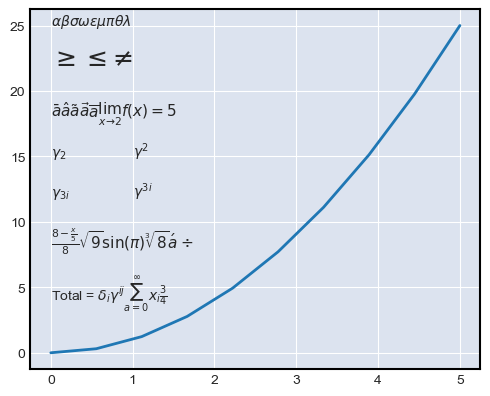

In [27]:
# You can use a subset of TeX markup by placing text between $$
# these basically create symbols
# matplotlib.org/tutorials/text/mathtext.html

fig5 = plt.figure(figsize=(5, 4), dpi=100)
axes6 = fig5.add_axes([0.1, 0.1, 0.9, 0.9])

# create symbols in coordinate (1, 23)
axes6.text(0, 25, r'$\alpha \beta \sigma \omega \epsilon \mu \pi \theta \lambda$') 
# kappa, iota, zeta, nu, rho, eta, xi, omicron, gamma, tau, phi, chi, psi, delta 
# Capitalize the first letter for uppercase

# create subscript
axes6.text(0, 15, r'$\gamma_2$')    # single subscript
axes6.text(0, 12, r'$\gamma_{3i}$') # multiple subscript

# create superscript
axes6.text(1, 15, r'$\gamma^2$')    # single superscript
axes6.text(1, 12, r'$\gamma^{3i}$') # multiple superscript

# combining all the code above
# Subscripts, multiletter superscript, sum, fractions, binomial
axes6.text(0, 4,
          r'Total = $ \delta_i \gamma^{ij} \sum_{a=0}^\infty x_i \frac{3}{4} $')

# Another fraction, sqrt, cbrt, trig functions : 
axes6.text(0, 8, 
            r'$\frac{8 - \frac{x}{5}} {8} \sqrt{9} \sin(\pi) \sqrt[3]{8} \acute a \div$', 
            fontsize=11)

axes6.text(0, 18, 
            r'$\bar a \hat a \tilde a \vec a \overline {a} \lim_{x \to 2} f(x) = 5$', 
            fontsize=11)

axes6.text(0, 22, 
            r'$\geq \leq \ne$', 
            fontsize=18)

axes6.plot(x1, y1)

plt.show()

### Histograms

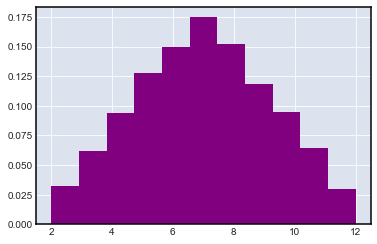

In [28]:
# Roll 2 6 sided dies get the sum and plot the histogram
array1 = np.random.randint(1, 7, 7000)
array2 = np.random.randint(1, 7, 7000)
array3 = array1 + array2

# Bins reprsent the number of options available 2 thru 12 = 11
# Density returns the frequency of each bin
# Range gets tuple with bin range interested in
# cumulative=True use a cumulative distribution
# histtype='step' genrates a line plot
# orientation='horizontal' 
# color='orange' change bar color

plt.hist(array3, bins=11, density=True, stacked=True, color='purple')

plt.show()

### Bar Charts

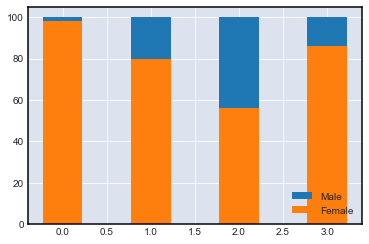

In [29]:
# Analyze where France gets its electricity from


energy = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
percentage = [71, 10, 3, 7, 2, 4, 3]

# Chart variance in usage per year
variance = [8, 3, 1, 3, 1, 2, 1]

# barh makes horizontal chart
# Also yerr, change error color with ecolor
# plt.bar(energy, percentage, color='purple', yerr=variance)

# Show percentages of males & females in engineering
male   = (76, 85, 86, 88, 93)
female = (24, 15, 14, 12, 7)

# Get evenly spaced values for each interval
spc = np.arange(5)

# plt.bar(spc, male, width=0.45, label='Male', edgecolor='black')
# plt.bar(spc+0.45, female, width=0.45, label='Female', edgecolor='black')
# plt.xticks(spc+0.45 / 2, ('Aero', 'Computer', 'Civil', 'Chemical', 'Mechanical'))
# width - width of the bar, edgecolor - border color of the bar
# +0.45 to plot the bar for female right beside the male
# xticks for the individual labels below the bars 



# Stacked bar chart
teach_type = ['kinder', 'Elementary', 'Secondary', 'Graduation']
male_teach = np.array([2, 20, 44, 14])
female_teach = np.array([98, 80, 56, 86])

index = [x for x, _ in enumerate(teach_type)]

# Plot stacked bars for men and then women under
plt.bar(index, male_teach, width=0.45, label='Male', bottom=female_teach)
plt.bar(index, female_teach, width=0.45, label='Female')

plt.legend(loc='lower right')

plt.show()

### Pie Chart

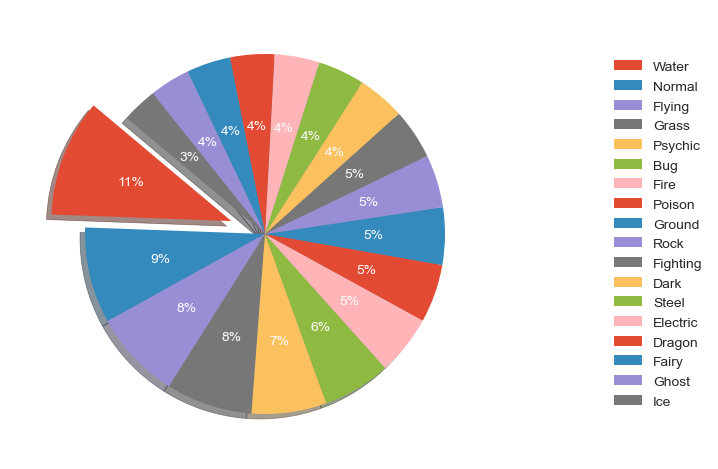

In [30]:
plt.style.use("ggplot")

fig6 = plt.figure(figsize=(8,5), dpi=100)
axes7 = fig6.add_axes([0.1,0.1,0.9,0.9])

# Create a pie chart of the number of Pokemon by type
poke_types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fairy',
'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

# Generate a random color array (Use lower values to make darkb)
colors = []
for i in range(len(poke_types)):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)
    
# Explode biggest 1st slice
explode = [0] * 18
explode[0] = 0.2

# Provide values, what to explode and by how much, labels, colors, percent for values,
# whether to shadow, amount to rotate pie, pie text color
wedges, texts, autotexts = plt.pie(poke_num, explode=explode, labels=poke_types,
                                   autopct='%1.0f%%', shadow=True,
                                   startangle=140, textprops=dict(color='white'))
# add colors = colors in plt.pie to use the colors list declared above

# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, poke_types, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

### Time series

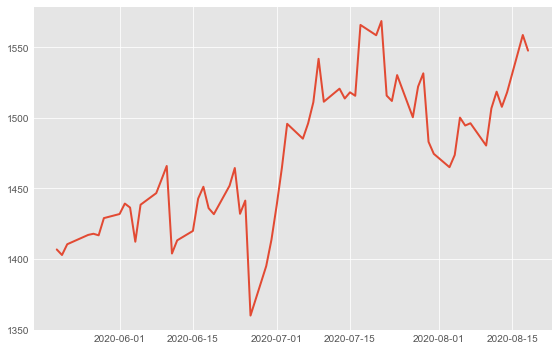

In [31]:
# Get Yahoo GOOG csv file and convert to NumPy array
# https://finance.yahoo.com/quote/GOOG/history/

goog_data = pd.read_csv("GOOG.csv")
goog_np = goog_data.to_numpy()

# Get array of prices in 5th column
goog_cp = goog_np[:,4] 
goog_data

# Get NumPy array with just weekdays between dates excluding holidays
# scrapping data
# holidays are excluded from the data
holidays = [datetime.datetime(2020, 5, 25), datetime.datetime(2020, 8, 19)]
date_array = pd.bdate_range(start='5/20/2020', end='8/19/2020', freq='C', holidays=holidays)

date_array_np = date_array.to_numpy()

fig7 = plt.figure(figsize=(8, 5))
axes8 = fig7.add_axes([0.1, 0.1, 0.9, 0.9]) # padding

plt.plot(date_array_np, goog_cp)

plt.show()

### Tables

c:\users\killerbee\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


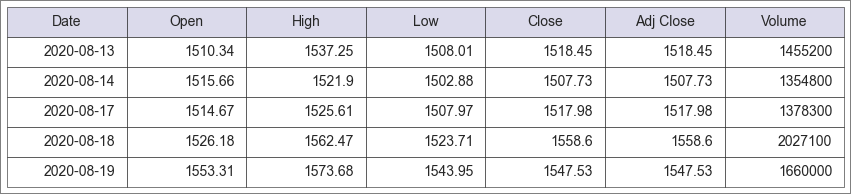

In [32]:
goog_data = pd.read_csv("GOOG.csv")

# prices
# Format column data to 2 decimals
goog_data['Open'] = pd.Series([ round(val, 2) for val in goog_data['Open']], index=goog_data.index )
goog_data['High'] = pd.Series([ round(val, 2) for val in goog_data['High']], index=goog_data.index )
goog_data['Low'] = pd.Series([ round(val, 2) for val in goog_data['Low']], index=goog_data.index )
goog_data['Close'] = pd.Series([ round(val, 2) for val in goog_data['Close']], index=goog_data.index )
goog_data['Adj Close'] = pd.Series([ round(val, 2) for val in goog_data['Adj Close']], 
                                    index=goog_data.index )

# goog_data

# Get most recent last 5 days of stock data
stock_data = goog_data[-5:] 
col_head = ('Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
stock_data_np = stock_data.to_numpy()

# Add padding around cells in table
plt.figure(linewidth=2, tight_layout={"pad":.5}, figsize=(5, 3))

# Get rid of axes and plot box
axes9 = plt.gca()
axes9.get_xaxis().set_visible(False)
axes9.get_yaxis().set_visible(False)

plt.box(on=None)

# np.full returns an array filled with 0.1
# cm is a colormap object we are using to use a default blue color
# matplotlib.org/3.1.0/tutorials/colors/colormaps.html
table_colors = plt.cm.PuBu(np.full(len(col_head), 0.2)) # cm - colormap

# Receives data, loc, list of column headers, column header color as array of colors
# You can also add rowLabel, rowColours, rowLoc: Text alignment
the_table = plt.table(cellText=stock_data_np, loc='center', colLabels=col_head,
                     colColours=table_colors)

# Set table font size
the_table.set_fontsize(14)
the_table.scale(3, 2.5)


plt.show()

### Scatterplot

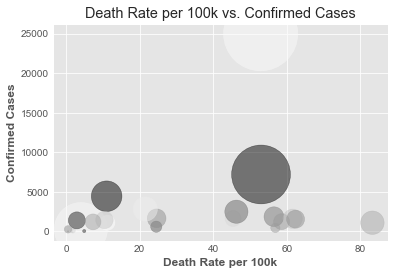

In [33]:
# Country array
country_array = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])

# Death rate per 100k Coronavirus
deathRate_array = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])

# Daily confirmed cases (Tests)
test_array = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])

# Dot size Confirmed cases
case_array = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])

case_array_shrink = case_array / 1000
color_array = np.random.rand(26)

plt.title("Death Rate per 100k vs. Confirmed Cases")
plt.xlabel("Death Rate per 100k")
plt.ylabel("Confirmed Cases")

plt.scatter(deathRate_array, test_array, s=case_array_shrink, c=color_array, alpha=0.5)
# s= size of the dots, c=color


plt.show()

### 3D Surface

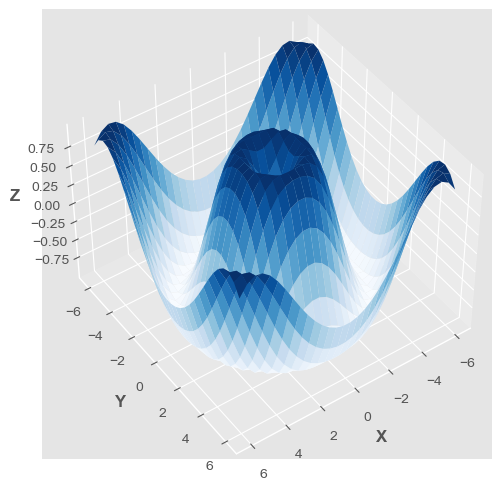

In [34]:
fig9 = plt.figure(figsize=(8,5), dpi=100)
axes10 = fig9.add_axes([0.1,0.1,0.9,0.9], projection='3d')
# [paddings]

z3 = 10 * np.random.random(100) # generate 100 random number from 0.0 to 1.0 and multiply by 10
x3 = np.sin(z3) * np.random.random(100)
y3 = np.cos(z3) * np.random.random(100)

# Create a 3D scatterplot
# axes10.scatter3D(x3, y3, z3, c=z3, cmap='Blues')
# The darker points are represented that way to seem closer to you

# You can create contour plots by defining a function for z based on x & y
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x4 = np.linspace(-6, 6, 30)
y4 = np.linspace(-6, 6, 30)

# Creates a rectangular grid out of 2 given 1D arrays
x4, y4 = np.meshgrid(x4, y4)
z4 = get_z(x4, y4)

# change viewing angle
axes10.view_init(45, 55)
# (viewing angle, rotate by 55)
# Change viewing angle to reorient camera 60 degrees and rotate 55

# Provide x, y, z, contours and color map
# axes10.contour3D(x4, y4, z4, 100, cmap='Blues')

# labels
axes10.set_xlabel("X")
axes10.set_ylabel("Y")
axes10.set_zlabel("Z")

# plot wireframe
# axes10.plot_wireframe(x4, y4, z4, color='blue')

# You can create surface plots which is wireframe with filled faces
axes10.plot_surface(x4, y4, z4, rstride=1, cstride=1, cmap='Blues', edgecolor='none')

plt.show()

### Finance

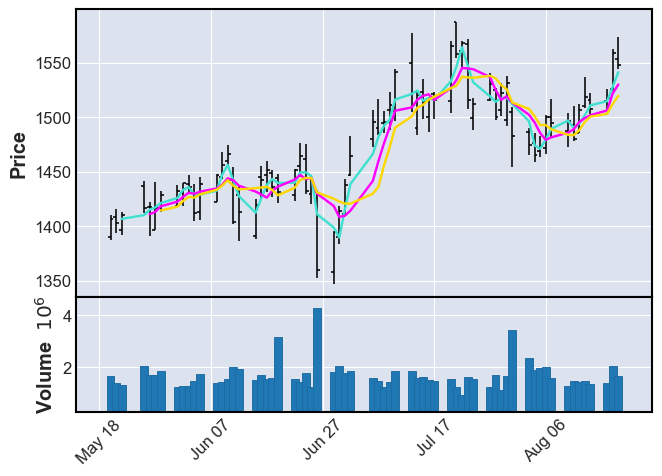

In [35]:
# Get stock data as DataFrame and define index
goog_df = pd.read_csv("GOOG.csv", index_col=0, parse_dates=True)
goog_df.index_name = 'Date'

goog_df.shape

# A candlestick chart demonstrates the daily open, high, low and closing price of a stock
# mpf.plot(goog_df,type='candle')

# Plot price changes
# mpf.plot(goog_df,type='line')

# Moving averages provide trend information (Average of previous 4 observations)
# mpf.plot(goog_df,type='ohlc',mav=4)

# You can plot multiple MAVs, volume, non-trading days
mpf.plot(goog_df, type='ohlc', mav=(3,5,7), volume=True, show_nontrading=True)

# You can make additonal charts with intraday data

### Heatmaps

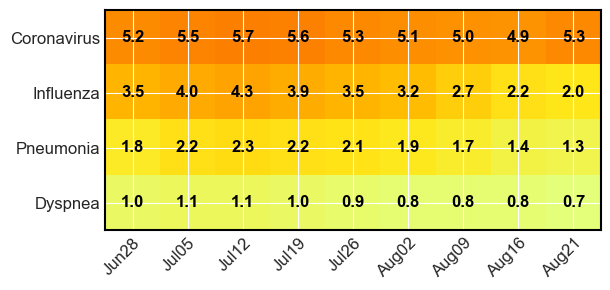

In [36]:
# A heatmap is a color coded representation of data from a 2D list
symptoms = ["Coronavirus","Influenza","Pneumonia","Dyspnea"]
dates = ["Jun28","Jul05","Jul12","Jul19","Jul26","Aug02","Aug09","Aug16","Aug21"]
symp_per = np.array([[5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
                    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
                    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
                    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]])

fig10, axes11 = plt.subplots()


# Define data to use and color map
im = axes11.imshow(symp_per, cmap='Wistia')

# Add ticks at data points and labels
axes11.set_xticks(np.arange(len(dates)))
axes11.set_yticks(np.arange(len(symptoms)))
axes11.set_xticklabels(dates)
axes11.set_yticklabels(symptoms)

# Rotate labels on the bottom so they don't overlap
plt.setp(axes11.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes11.text(j, i, symp_per[i, j], ha="center", va="center", color="black",
                          fontweight="bold")
        
plt.savefig('Diseases.jpg', dpi=300)

plt.show()